In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit,LeaveOneOut,cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn import neighbors 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Section 1: Data preparation

## 1.1 Exploratory Data Analysis

In [2]:
data = pd.read_csv("./Weather Forecast Training.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51978 entries, 0 to 51977
Data columns (total 16 columns):
Location         51978 non-null object
MinTemp          51694 non-null float64
MaxTemp          51849 non-null float64
Rainfall         51231 non-null float64
Evaporation      29425 non-null float64
Sunshine         27103 non-null float64
WindGustDir      48380 non-null object
WindGustSpeed    48407 non-null float64
WindDir          50465 non-null object
WindSpeed        50954 non-null float64
Humidity         50549 non-null float64
Pressure         46912 non-null float64
Cloud            31848 non-null float64
Temp             50915 non-null float64
RainToday        51231 non-null object
RainTomorrow     51978 non-null object
dtypes: float64(11), object(5)
memory usage: 6.3+ MB


I can see these data didn't have same rows, so I should fill Nan or drop them to make sure they have same rows.

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
count,51694.000000,51849.000000,51231.000000,29425.000000,27103.000000,48407.000000,50954.000000,50549.000000,46912.000000,31848.000000,50915.000000
mean,12.549174,22.512698,3.639494,5.177570,6.530580,42.003016,19.092299,57.432214,1014.273338,5.175647,20.845623
std,6.376746,7.113064,11.009628,4.017662,3.946561,14.627024,9.157505,21.833045,7.278733,2.632166,6.938471
min,-8.000000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,977.100000,0.000000,-4.400000
25%,7.900000,17.200000,0.000000,2.400000,3.200000,31.000000,13.000000,42.000000,1009.300000,3.000000,15.700000
50%,12.300000,21.800000,0.000000,4.400000,6.900000,39.000000,19.000000,58.000000,1014.200000,6.000000,20.200000
75%,17.200000,27.500000,2.200000,7.000000,9.900000,50.000000,24.000000,73.000000,1019.200000,7.000000,25.600000
max,31.400000,47.000000,371.000000,77.300000,14.500000,135.000000,83.000000,100.000000,1037.800000,8.000000,46.100000


In [5]:
data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,NaN,NaN,SSE,41.0,SSE,28.0,55.0,1026.0,NaN,22.4,No,Yes
1,Nuriootpa,11.1,20.8,0.0,4.8,8.3,W,39.0,WSW,26.0,48.0,1014.4,7.0,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,NaN,NaN,SE,44.0,SW,9.0,99.0,1028.5,NaN,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,NaN,NaN,WSW,35.0,WNW,19.0,55.0,1023.0,4.0,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,NaN,NaN,NNE,41.0,ESE,7.0,40.0,1027.1,NaN,22.5,No,No


In [6]:
data.tail(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
51973,CoffsHarbour,20.1,25.8,5.6,4.4,8.2,ESE,28.0,SE,13.0,72.0,1018.9,3.0,24.7,Yes,Yes
51974,Sydney,14.2,18.6,2.8,4.0,0.0,SSE,41.0,SE,20.0,52.0,1022.3,NaN,17.2,Yes,Yes
51975,BadgerysCreek,11.1,17.2,1.2,NaN,NaN,W,31.0,W,11.0,92.0,1018.7,NaN,12.9,Yes,Yes
51976,Sydney,19.0,24.8,0.0,5.2,7.5,NaN,NaN,E,17.0,65.0,1015.4,7.0,23.4,No,No
51977,Richmond,21.6,36.2,0.0,5.6,NaN,ENE,31.0,ENE,7.0,47.0,1005.9,NaN,32.8,No,No


In [7]:
data.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir           object
WindSpeed        float64
Humidity         float64
Pressure         float64
Cloud            float64
Temp             float64
RainToday         object
RainTomorrow      object
dtype: object

## 1.2 Data Cleaning

### 1.2.1 Dropping the missing or null values

In [8]:
data.isnull().sum()

Location             0
MinTemp            284
MaxTemp            129
Rainfall           747
Evaporation      22553
Sunshine         24875
WindGustDir       3598
WindGustSpeed     3571
WindDir           1513
WindSpeed         1024
Humidity          1429
Pressure          5066
Cloud            20130
Temp              1063
RainToday          747
RainTomorrow         0
dtype: int64

In [9]:
data.count()

Location         51978
MinTemp          51694
MaxTemp          51849
Rainfall         51231
Evaporation      29425
Sunshine         27103
WindGustDir      48380
WindGustSpeed    48407
WindDir          50465
WindSpeed        50954
Humidity         50549
Pressure         46912
Cloud            31848
Temp             50915
RainToday        51231
RainTomorrow     51978
dtype: int64

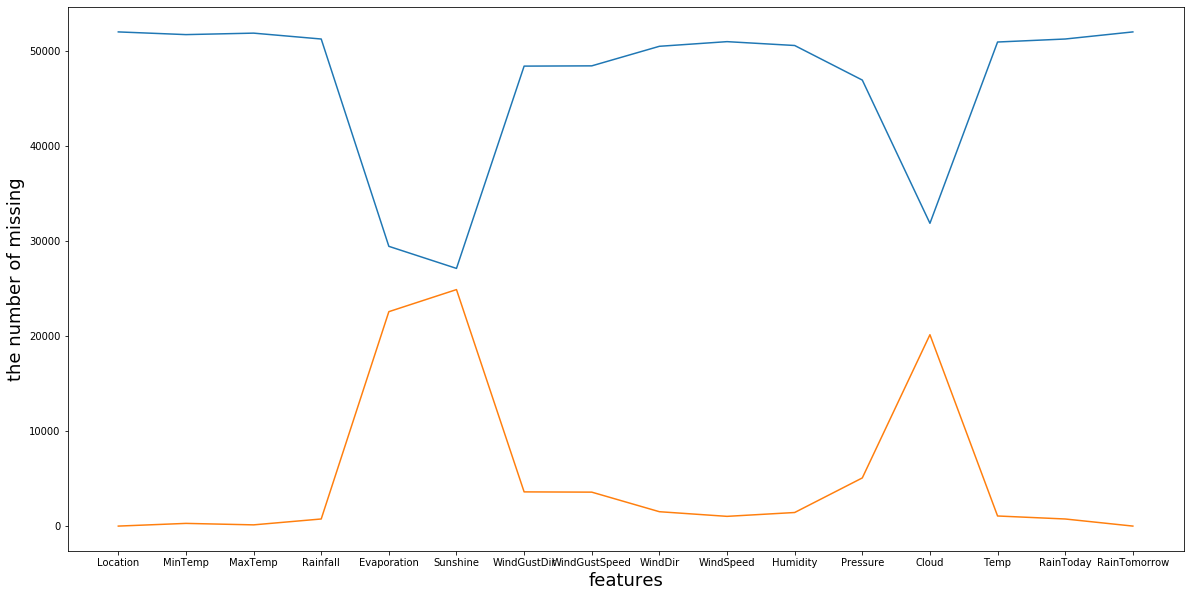

In [10]:
plt.figure(figsize=(20,10))
plt.xlabel('features',fontsize=18)
plt.ylabel('the number of missing',fontsize=18)
plt.plot(data.count())
plt.plot(data.isnull().sum())

I can see there are a lot of missing value in this dataset. Especially in Evaporation, Sunshine, Cloud, etc. But at first, let's deal with Temperature. In MinTemp and MaxTemp, I can use the Temperature in a day to fill NaN, and we can use the average of MinTemp and MaxTemp as the Temperature in this day. Similarly, I also can deal with WindGustSpeed and WindSpeed, make them fill each other.

In [11]:
name = ['Location', 'MinTemp', 'Temp','MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindDir','WindGustSpeed', 'WindSpeed', 'Humidity',
       'Pressure', 'Cloud', 'RainToday', 'RainTomorrow']
data = data[name]
data.MinTemp.fillna(method='bfill',inplace=True)
data.MaxTemp.fillna(method='ffill',inplace=True)
data.Temp.fillna((data.MinTemp+data.MaxTemp)/2,inplace=True)
data.WindGustSpeed.fillna(method='bfill',inplace=True)
data.WindSpeed.fillna(method='ffill',inplace=True)

In [12]:
data.Rainfall = data.Rainfall.fillna(0)
data.RainToday = ["Yes" if status > 1 else "No" for status in data.Rainfall]

I can see there are 747 rows missing in Rainfall and  747 rows missing in RainTomorrow, and they are in the same rows from the above statistics, so I consider missing value in Rainfall means there was not rain in that day. According to 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0, so fillna to RainToday.

In [13]:
data.isnull().sum()

Location             0
MinTemp              0
Temp                 0
MaxTemp              0
Rainfall             0
Evaporation      22553
Sunshine         24875
WindGustDir       3598
WindDir           1513
WindGustSpeed        0
WindSpeed            0
Humidity          1429
Pressure          5066
Cloud            20130
RainToday            0
RainTomorrow         0
dtype: int64

In [14]:
df_mean = data.groupby('Location').mean()
df_mean.head(5)

,MinTemp,Temp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud
Location,,,,,,,,,,,
Adelaide,12.296931,19.934567,21.375451,2.235018,5.460000,6.316694,39.264440,16.085740,51.093044,1015.534959,NaN
Albany,12.590025,17.378986,19.630417,3.071055,3.863768,5.963781,41.418643,18.899428,69.400215,1014.930256,5.374332
Albury,9.642521,20.125306,21.532549,2.615428,NaN,NaN,34.680151,14.760113,54.276415,1014.684340,5.837321
AliceSprings,13.895978,27.586704,28.971844,1.491844,8.853589,8.731471,41.163128,17.849162,28.806488,1012.489497,3.813836
BadgerysCreek,12.069322,21.981760,23.669027,3.157129,NaN,NaN,34.364798,13.796460,58.002988,1015.273602,NaN


Taking into account the environment and temperature in different locations, it cannot be calculated by averaging all the data. Therefore, I groupby this data by locations, and used theirselves average data to fill NaN in order to ensure more accurate and reliable data。

In [15]:
df_mean.Pressure = df_mean.Pressure.fillna(df_mean.Pressure.mean()) 

In [16]:
data_fill = pd.DataFrame()
locations = data.Location.unique()
for i in locations:
    t = data.Location == i
    a = data[t].fillna(data[t].mean())
    data_fill = data_fill.append(a)

In [17]:
data_fill.isnull().sum()

Location             0
MinTemp              0
Temp                 0
MaxTemp              0
Rainfall             0
Evaporation      16332
Sunshine         19092
WindGustDir       3598
WindDir           1513
WindGustSpeed        0
WindSpeed            0
Humidity             0
Pressure          4253
Cloud            12756
RainToday            0
RainTomorrow         0
dtype: int64

In [18]:
data_fill.Pressure = data_fill.Pressure.fillna(data_fill.Pressure.mean())
data = data_fill

In [19]:
categorical_columns = ['WindGustDir', 'WindDir']
data = pd.get_dummies(data, columns=categorical_columns)

Now I get the average of Rainfall in every locations, so I can

### 1.2.2 Detecting Outliers

I can see there are few columns which have some outliers, so I drop some of them by statistics methods.

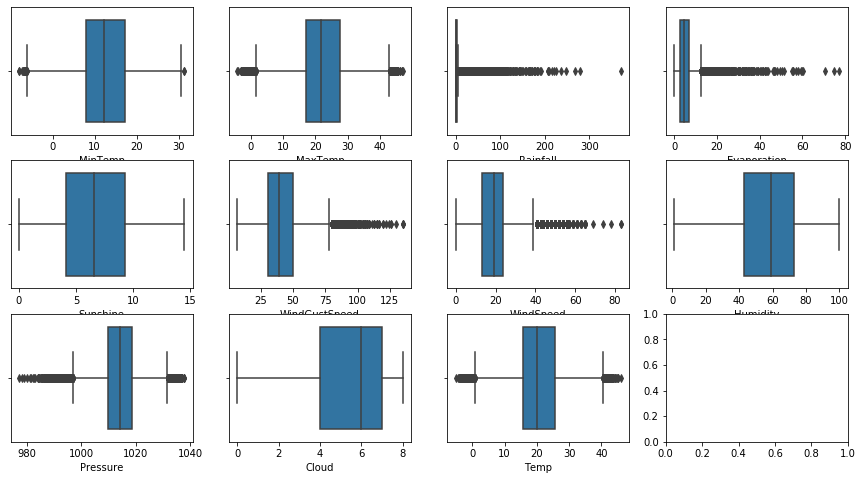

In [20]:
fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8], [ax9, ax10, ax11, ax12]) = plt.subplots(3,4, figsize=(15,8))
sns.boxplot(x=data['MinTemp'],ax=ax1)
sns.boxplot(x=data['MaxTemp'], ax=ax2)
sns.boxplot(x=data['Rainfall'], ax=ax3)
sns.boxplot(x=data['Evaporation'],ax=ax4)
sns.boxplot(x=data['Sunshine'],ax=ax5)
sns.boxplot(x=data['WindGustSpeed'],ax=ax6)
sns.boxplot(x=data['WindSpeed'],ax=ax7)
sns.boxplot(x=data['Humidity'],ax=ax8)
sns.boxplot(x=data['Pressure'],ax=ax9)
sns.boxplot(x=data['Cloud'],ax=ax10)
sns.boxplot(x=data['Temp'],ax=ax11)
plt.show()

In [21]:
data.shape

(51978, 46)

In [22]:
data.isnull().sum()

Location               0
MinTemp                0
Temp                   0
MaxTemp                0
Rainfall               0
Evaporation        16332
Sunshine           19092
WindGustSpeed          0
WindSpeed              0
Humidity               0
Pressure               0
Cloud              12756
RainToday              0
RainTomorrow           0
WindGustDir_E          0
WindGustDir_ENE        0
WindGustDir_ESE        0
WindGustDir_N          0
WindGustDir_NE         0
WindGustDir_NNE        0
WindGustDir_NNW        0
WindGustDir_NW         0
WindGustDir_S          0
WindGustDir_SE         0
WindGustDir_SSE        0
WindGustDir_SSW        0
WindGustDir_SW         0
WindGustDir_W          0
WindGustDir_WNW        0
WindGustDir_WSW        0
WindDir_E              0
WindDir_ENE            0
WindDir_ESE            0
WindDir_N              0
WindDir_NE             0
WindDir_NNE            0
WindDir_NNW            0
WindDir_NW             0
WindDir_S              0
WindDir_SE             0


### 1.2.3 Drop useless data
There are 16 directions in WindGustDir and WindDir, it's too difficult to use them in model, and general speaking, the direction of wind won't affect rain or not, so I drop them both. As for RainToday, I 

In [23]:
data = data.drop(['Evaporation','Sunshine','Cloud'],axis=1)
data = data.sort_index(axis = 0)

In [24]:
data = data.set_index('Location')
data.isnull().sum()

MinTemp            0
Temp               0
MaxTemp            0
Rainfall           0
WindGustSpeed      0
WindSpeed          0
Humidity           0
Pressure           0
RainToday          0
RainTomorrow       0
WindGustDir_E      0
WindGustDir_ENE    0
WindGustDir_ESE    0
WindGustDir_N      0
WindGustDir_NE     0
WindGustDir_NNE    0
WindGustDir_NNW    0
WindGustDir_NW     0
WindGustDir_S      0
WindGustDir_SE     0
WindGustDir_SSE    0
WindGustDir_SSW    0
WindGustDir_SW     0
WindGustDir_W      0
WindGustDir_WNW    0
WindGustDir_WSW    0
WindDir_E          0
WindDir_ENE        0
WindDir_ESE        0
WindDir_N          0
WindDir_NE         0
WindDir_NNE        0
WindDir_NNW        0
WindDir_NW         0
WindDir_S          0
WindDir_SE         0
WindDir_SSE        0
WindDir_SSW        0
WindDir_SW         0
WindDir_W          0
WindDir_WNW        0
WindDir_WSW        0
dtype: int64

In [25]:
data.shape

(51978, 42)

## 1.3 Data Preprocessing

### 1.3.1 Dummy Variables

In [26]:
data['RainTomorrow'] = data['RainTomorrow'].map(dict(Yes=1,No=0))
data['RainToday'] = data['RainToday'].map(dict(Yes=1,No=0))
data.head(5)

,MinTemp,Temp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,RainToday,RainTomorrow,...,WindDir_NNW,WindDir_NW,WindDir_S,WindDir_SE,WindDir_SSE,WindDir_SSW,WindDir_SW,WindDir_W,WindDir_WNW,WindDir_WSW
Location,,,,,,,,,,,,,,,,,,,,,
NorahHead,18.9,22.4,23.7,0.0,41.0,28.0,55.0,1026.0,0,1,...,0,0,0,0,1,0,0,0,0,0
Nuriootpa,11.1,19.5,20.8,0.0,39.0,26.0,48.0,1014.4,0,0,...,0,0,0,0,0,0,0,0,0,1
GoldCoast,15.9,17.8,19.5,17.6,44.0,9.0,99.0,1028.5,1,1,...,0,0,0,0,0,0,1,0,0,0
Bendigo,0.0,14.2,14.9,0.0,35.0,19.0,55.0,1023.0,0,1,...,0,0,0,0,0,0,0,0,1,0
Walpole,9.1,22.5,22.7,0.0,41.0,7.0,40.0,1027.1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.3.2 Normalization

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
df_normalized = pd.DataFrame(np_scaled, columns=data.columns, index=data.index)
df_normalized.describe()



,MinTemp,Temp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,RainToday,RainTomorrow,...,WindDir_NNW,WindDir_NW,WindDir_S,WindDir_SE,WindDir_SSE,WindDir_SSW,WindDir_SW,WindDir_W,WindDir_WNW,WindDir_WSW
count,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,...,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000
mean,0.521658,0.506470,0.520828,0.009669,0.273322,0.230057,0.571218,0.612198,0.301801,0.490958,...,0.057736,0.064566,0.066740,0.070934,0.062007,0.056543,0.062969,0.072088,0.066066,0.066470
std,0.161850,0.135774,0.139206,0.029485,0.114097,0.110371,0.218155,0.113995,0.459044,0.499923,...,0.233246,0.245760,0.249573,0.256717,0.241171,0.230970,0.242909,0.258636,0.248401,0.249105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403553,0.406829,0.416830,0.000000,0.187500,0.156627,0.424242,0.540362,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.515228,0.492683,0.506849,0.000000,0.250000,0.228916,0.585859,0.612198,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.639594,0.600000,0.618395,0.005391,0.335938,0.289157,0.727273,0.683690,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dist_matrix = pd.DataFrame(distance_matrix(df_normalized.values,
                           df_normalized.values, p=2),
                           index=df_normalized.index,
                           columns=df_normalized.index)

In [ ]:
data = df_normalized

# Section 2: Build, tune and evaluate cluster analysis and decision tree models 

## 2.1 KMeans Analysis

### 2.1.1 Build Model

In [ ]:
col_name = df_normalized.columns[0:11]

In [ ]:
X = pd.DataFrame(data, columns=col_name)
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=6)
kmeans.fit(X_train)

In [ ]:
kmeans.__dict__.keys()

In [ ]:
kmeans.labels_

In [ ]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, kmeans.labels_)    
predictedLabel = knn.predict(X_test)

In [ ]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test,predictedLabel)*100)}%")

In [ ]:
confusion_matrix(y_test, predictedLabel)

In [ ]:
r = metrics.classification_report(y_test, predictedLabel)
print('report：', r, sep='\n')

First, I used Kmeans to cluster these data, and used KNN to make a regression for predicting. From above results, I can see the accuracy score is 100%. I am wondering if this model is overfitting, so I would try to adjust parameters for checking.

### 2.1.2 Tune Model

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=100, random_state=25)
kmeans.fit(X_train)

In [ ]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, kmeans.labels_)    
predictedLabel = knn.predict(X_test)

In [ ]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test,predictedLabel)*100)}%")

In [ ]:
confusion_matrix(y_test, predictedLabel)

n_init is different centroid seeds. max_iter is maximum number of iterations of the k-means algorithm for a single run. 
But the score didn't change after I adjusted these parameters. 

### 2.2 HAC

### 2.2.1 Build Model

In [ ]:
data_hac = data_fill

In [ ]:
data_hac = data_hac.drop(['Evaporation','Sunshine','Cloud','WindGustDir','WindDir'],axis=1)
data_hac = data_hac.sort_index(axis = 0)
data_hac['RainTomorrow'] = data_hac['RainTomorrow'].map(dict(Yes=1,No=0))
data_hac['RainToday'] = data_hac['RainToday'].map(dict(Yes=1,No=0))
data_hac = data_hac.set_index('Location')

hac_min_max_scaler = preprocessing.MinMaxScaler()
hac_np_scaled = hac_min_max_scaler.fit_transform(data_hac)
hac_df_normalized = pd.DataFrame(hac_np_scaled, columns=data_hac.columns, index=data_hac.index)
hac_df_normalized.describe()
hac_dist_matrix = pd.DataFrame(distance_matrix(hac_df_normalized.values,
                           hac_df_normalized.values, p=2),
                           index=hac_df_normalized.index,
                           columns=hac_df_normalized.index)


In [ ]:
hac_col_name = ['MinTemp','Temp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed','Humidity','Pressure','RainToday']
X = pd.DataFrame(hac_df_normalized, columns=hac_col_name)
y = hac_df_normalized['RainTomorrow']

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hac_pred = cluster.fit_predict(X)

In [ ]:
hac_pred

In [ ]:
print(f"Accuracy: {round(metrics.accuracy_score(hac_pred,y)*100)}%")

In [ ]:
confusion_matrix(hac_pred, y)

In [ ]:
h = metrics.classification_report(hac_pred, y)
print('report：', h, sep='\n')

### 2.2.2 Tune Model

There is no way to adjust parameters.

## 2.3 Decision Tree 

### 2.3.1 Build Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
np.random.seed(66)

In [ ]:
data = df_normalized

In [ ]:
X = data.drop(['RainTomorrow'],axis=1)
y = data["RainTomorrow"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"train data size is {X_train.shape}")
print(f"test data size is {X_test.shape}")

In [ ]:
clf = DecisionTreeClassifier()
clf

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
clf.tree_.max_depth

In [ ]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100)}%")

In [ ]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion.columns.name = "Pred"
df_confusion

In [ ]:
print(metrics.classification_report(y_test, y_pred))

I used default parameters to build decision tree model, the max_depth is 39, and the score is 69%. So I will try to adjust parameters for a better model.

### 2.3.2 Tune Model

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20, 30],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_score_)

In [ ]:
for hps, values in grid.best_params_.items():
    print(f"{hps}: {values}")

In this part, I used gridsearch to explore which parameters can help improve the performance of this model, the best score is 73.9%, and above are the parameters of the model.

In [ ]:
bstrap = ShuffleSplit(n_splits=10, test_size=0.3, random_state=16)
grid_bstrap = GridSearchCV(clf, param_grid, cv=bstrap)
grid_bstrap.fit(X_train, y_train)

For using unbiased data, I used bootstrapping to make sure that the data is good for model. Then, I continued to use gridsearch for looking for better parameters.

In [ ]:
print(f"Accuracy: {round(grid_bstrap.best_score_*100, 2)}%")

In [ ]:
for key, value in grid_bstrap.best_params_.items():
    print(f"Hyperparameter: {key}; Value: {value}")

In [ ]:
#ROC

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,pos_label=None,sample_weight=None,drop_intermediate=True)

plt.plot(fpr,tpr,marker = 'o')

plt.show()

In [ ]:
from sklearn.metrics import auc

AUC = auc(fpr, tpr)

AUC

## 3. Validate Model

In [ ]:
validation = pd.read_csv("./Weather Forecast Testing.csv")

In [ ]:
validation.head(5)

In [ ]:
validation.describe()

In [ ]:
validation.info()

In [ ]:
validation.isnull().sum()

In [ ]:
name = ['Location', 'MinTemp', 'Temp','MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindDir','WindGustSpeed', 'WindSpeed', 'Humidity',
       'Pressure', 'Cloud', 'RainToday']
validation.Rainfall = validation.Rainfall.fillna(0)
validation.RainToday = ["Yes" if status > 1 else "No" for status in validation.Rainfall]
validation = validation[name]
validation.MinTemp.fillna(method='bfill',inplace=True)
validation.MaxTemp.fillna(method='ffill',inplace=True)
validation.Temp.fillna((validation.MinTemp+validation.MaxTemp)/2,inplace=True)
validation.WindGustSpeed.fillna(method='bfill',inplace=True)
validation.WindSpeed.fillna(method='ffill',inplace=True)
validation = validation.drop(['Evaporation','Sunshine','Cloud'],axis=1)
validation.Cloud = data_fill.Cloud.fillna(data_fill.Cloud.mean())
validation.Rainfall = data_fill.Rainfall.fillna(data_fill.Rainfall.mean())
validation.Evaporation = data_fill.Evaporation.fillna(data_fill.Evaporation.mean())
validation.Sunshine = data_fill.Sunshine.fillna(data_fill.Sunshine.mean())
validation.Pressure = data_fill.Pressure.fillna(data_fill.Pressure.mean())
validation.Humidity = data_fill.Humidity.fillna(data_fill.Humidity.mean())
categorical_columns = ['WindGustDir', 'WindDir']
validation = pd.get_dummies(validation, columns=categorical_columns)
validation['RainToday'] = validation['RainToday'].map(dict(Yes=1,No=0))

In [ ]:

X_validation = pd.DataFrame(validation,columns=validation.columns[1:43])
X_validation

In [ ]:
# KMeans
kmeans.fit(X_validation)
kmeans_pred = kmeans.labels_

In [ ]:
#HAC
hac_pred = cluster.fit_predict(X_validation)

In [ ]:
#DT
clf_pred = clf.predict(X_validation).astype(int)

In [ ]:
result = pd.DataFrame(list(zip(validation.index,kmeans_pred,hac_pred,clf_pred)),columns=['ID','KMeans','HAC','DecisionTree'])
result

In [ ]:
result.to_csv("./testing_predicted.csv")